In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\johnC\Downloads\cleaned_data (1).csv')

data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80,77.0,0
1,0,46,2,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95,76.0,0
2,1,48,1,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75,70.0,0
3,0,61,3,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65,103.0,1
4,0,46,3,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85,85.0,0


In [3]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Property value fill-in

#### Since we cannot predict or fill in NA values for some perspects like education which is comparably unrelated to other condition, we just remove these values 

In [4]:
data_clean_1 = data.dropna(subset=['education', 'cigsPerDay', 'heartRate','BMI'])

In [5]:
data_clean_1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## BPMeds fill-in
#### Hyperpressure will be urgent if the sysBP is > 140 or diaBP is > 90, o.w we consider it not in danger

In [6]:
data_clean_1.loc[(data_clean_1['BPMeds'].isna()) & (data_clean_1['sysBP'] > 140), 'BPMeds'] = 1
data_clean_1.loc[(data_clean_1['BPMeds'].isna()) & (data_clean_1['diaBP'] > 90), 'BPMeds'] = 1
data_clean_1.loc[(data_clean_1['BPMeds'].isna()),'BPMeds'] = 0
data_clean_1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Glucose fill-in

In [7]:
mean_glucose_no_diabetes = data_clean_1[data_clean_1['diabetes'] == 0]['glucose'].mean()
mean_glucose_with_diabetes = data_clean_1[data_clean_1['diabetes'] == 1]['glucose'].mean()

print(mean_glucose_no_diabetes)
print(mean_glucose_with_diabetes)

79.44785615445645
169.17821782115382


In [8]:
data_clean_1.loc[(data_clean_1['glucose'].isna()) & (data_clean_1['diabetes'] == 0), 'glucose'] = mean_glucose_no_diabetes
data_clean_1.loc[(data_clean_1['glucose'].isna()), 'glucose'] = mean_glucose_with_diabetes

data_clean_1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## totChol fill-in


In [9]:
mean_ch_slim = data_clean_1[data_clean_1['BMI'] < 18.5]['totChol'].mean()
mean_ch_norm = data_clean_1[(data_clean_1['BMI'] >= 18.5) & (data_clean_1['BMI'] <= 24.9)]['totChol'].mean()
mean_ch_fat = data_clean_1[data_clean_1['BMI'] > 24.9]['totChol'].mean()

print(mean_ch_slim)
print(mean_ch_norm)
print(mean_ch_fat)


215.83636363571426
230.86085972821948
241.82175090249444


In [10]:
data_clean_1.loc[((data_clean_1['totChol'].isna()) & data_clean_1['BMI'] < 18.5), 'totChol'] = mean_ch_slim
data_clean_1.loc[((data_clean_1['totChol'].isna()) & data_clean_1['BMI'] > 24.9), 'totChol'] = mean_ch_fat
data_clean_1.loc[data_clean_1['totChol'].isna(), 'totChol'] = mean_ch_norm

data_clean_1.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
# Check skewness of glucose and totChol before and after log transformation
print("Skewness before log transformation:")
print(data_clean_1[['glucose', 'totChol']].skew())

# Apply log transformation
data_clean_1['log_glucose'] = np.log1p(data_clean_1['glucose'])
data_clean_1['log_totChol'] = np.log1p(data_clean_1['totChol'])

print("Skewness after log transformation:")
print(data_clean_1[['log_glucose', 'log_totChol']].skew())


Skewness before log transformation:
glucose    6.515281
totChol    0.000000
dtype: float64
Skewness after log transformation:
log_glucose    2.369234
log_totChol    0.000000
dtype: float64


In [12]:
# Check skewness of sysBP and diaBP before and after square root transformation
print("Skewness before square root transformation:")
print(data_clean_1[['sysBP', 'diaBP']].skew())

# Apply square root transformation
data_clean_1['sqrt_sysBP'] = np.sqrt(data_clean_1['sysBP'])
data_clean_1['sqrt_diaBP'] = np.sqrt(data_clean_1['diaBP'])

print("Skewness after square root transformation:")
print(data_clean_1[['sqrt_sysBP', 'sqrt_diaBP']].skew())


Skewness before square root transformation:
sysBP    1.145919
diaBP    0.723749
dtype: float64
Skewness after square root transformation:
sqrt_sysBP    0.858804
sqrt_diaBP    0.451698
dtype: float64


In [13]:
# Interaction terms
data_clean_1['age_cigs'] = data_clean_1['age'] * data_clean_1['cigsPerDay']  # Age and smoking interaction
data_clean_1['bmi_glucose'] = data_clean_1['BMI'] * data_clean_1['glucose']  # BMI and glucose interaction
data_clean_1['sys_dia_ratio'] = data_clean_1['sysBP'] / data_clean_1['diaBP']  # Ratio of systolic to diastolic BP

# Non-linear transformations
data_clean_1['log_glucose'] = np.log1p(data_clean_1['glucose'])  # Log transformation of glucose
data_clean_1['sqrt_sysBP'] = np.sqrt(data_clean_1['sysBP'])      # Square root transformation of systolic BP
data_clean_1['sqrt_diaBP'] = np.sqrt(data_clean_1['diaBP'])      # Square root transformation of diastolic BP

# Calculate Mean Arterial Pressure (MAP)
data_clean_1['MeanArterialPressure'] = data_clean_1['diaBP'] + (1/3) * (data_clean_1['sysBP'] - data_clean_1['diaBP'])
data_clean_1['sqrt_MAP'] = np.sqrt(data_clean_1['MeanArterialPressure'])


# Verify the new features
new_features = ['age_cigs', 'bmi_glucose', 'sys_dia_ratio', 'log_glucose', 'sqrt_sysBP', 'sqrt_diaBP', 'MeanArterialPressure', 'sqrt_MAP']
print(data_clean_1[new_features].head())


   age_cigs  bmi_glucose  sys_dia_ratio  log_glucose  sqrt_sysBP  sqrt_diaBP  \
0         0      2076.69       1.514286     4.356709   10.295630    8.366600   
1         0      2183.48       1.493827     4.343805   11.000000    9.000000   
2       960      1773.80       1.593750     4.262680   11.291590    8.944272   
3      1830      2943.74       1.578947     4.644391   12.247449    9.746794   
4      1058      1963.50       1.547619     4.454347   11.401754    9.165151   

   MeanArterialPressure   sqrt_MAP  
0             82.000000   9.055385  
1             94.333333   9.712535  
2             95.833333   9.789450  
3            113.333333  10.645813  
4             99.333333   9.966611  


Skewness of MAP before transformation: 0.9280709912958942
Skewness of MAP after square root transformation: 0.668353099902222


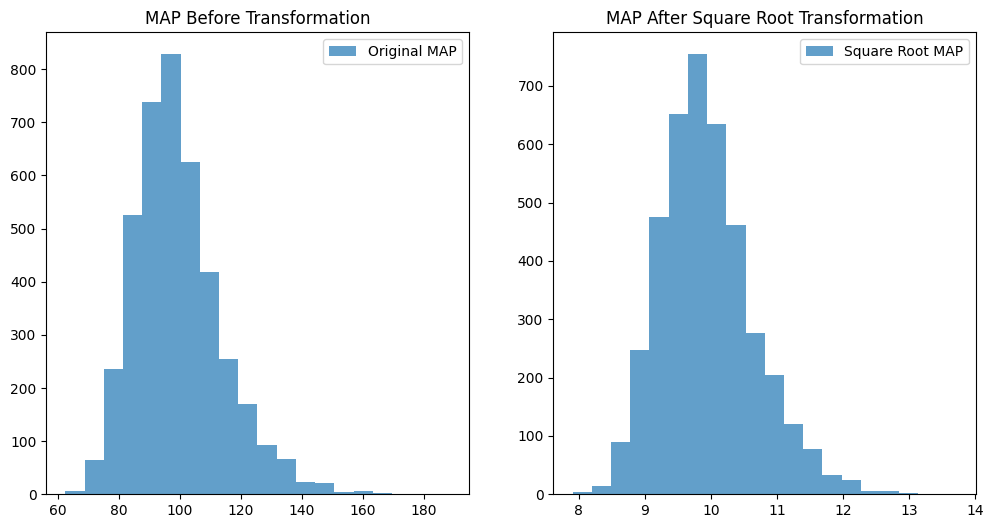

In [14]:
from scipy.stats import skew
print("Skewness of MAP before transformation:", skew(data_clean_1['MeanArterialPressure']))

data_clean_1['sqrt_MAP'] = np.sqrt(data_clean_1['MeanArterialPressure'])
print("Skewness of MAP after square root transformation:", skew(data_clean_1['sqrt_MAP']))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data_clean_1['MeanArterialPressure'], bins=20, alpha=0.7, label='Original MAP')
plt.legend()
plt.title("MAP Before Transformation")

plt.subplot(1, 2, 2)
plt.hist(data_clean_1['sqrt_MAP'], bins=20, alpha=0.7, label='Square Root MAP')
plt.legend()
plt.title("MAP After Square Root Transformation")
plt.show()


In [15]:
data_clean_1.to_csv('cleaned_data_with_interactions.csv', index=False)

In [16]:
data_clean_1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,TenYearCHD,log_glucose,log_totChol,sqrt_sysBP,sqrt_diaBP,age_cigs,bmi_glucose,sys_dia_ratio,MeanArterialPressure,sqrt_MAP
0,1,39,4,0,0,0,0,0,0,215.836364,...,0,4.356709,5.379143,10.295630,8.366600,0,2076.690000,1.514286,82.000000,9.055385
1,0,46,2,0,0,0,0,0,0,215.836364,...,0,4.343805,5.379143,11.000000,9.000000,0,2183.480000,1.493827,94.333333,9.712535
2,1,48,1,1,20,0,0,0,0,215.836364,...,0,4.262680,5.379143,11.291590,8.944272,960,1773.800000,1.593750,95.833333,9.789450
3,0,61,3,1,30,0,0,1,0,215.836364,...,1,4.644391,5.379143,12.247449,9.746794,1830,2943.740000,1.578947,113.333333,10.645813
4,0,46,3,1,23,0,0,0,0,215.836364,...,0,4.454347,5.379143,11.401754,9.165151,1058,1963.500000,1.547619,99.333333,9.966611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,50,1,1,1,0,0,1,0,215.836364,...,1,4.465908,5.379143,13.379088,9.591663,50,2233.420000,1.945652,121.000000,11.000000
4083,1,51,3,1,43,0,0,0,0,215.836364,...,0,4.234107,5.379143,11.247222,8.944272,2193,1340.280000,1.581250,95.500000,9.772410
4084,0,48,2,1,20,0,0,0,0,215.836364,...,0,4.465908,5.379143,11.445523,8.485281,960,1892.000000,1.819444,91.666667,9.574271
4085,0,44,1,1,15,0,0,0,0,215.836364,...,0,4.387609,5.379143,11.247222,9.327379,660,1522.220924,1.454023,100.166667,10.008330


# NA data existing cases processing methods

### Missing Types
1. education
2. cigsPerDay
3. BPMeds
4. totChol
5. BMI
6. heartRate
7. glucose

### Processing

1. Remove \
    ('education', 'BMI') : personal demographics could be removed\
    ('cigsPerDay') : All NA values are not 0 since  they are all current smokers\
    ('heartRate') : only 1 record

2. Mean interpolation \
    ('BPMeds') : based on the current blood pressure condition, will be 1 if urgent condition currently, else 0.\
    ('totChol') : 3 ranges (underweight - normal - overweight) according to BMI\
    ('glucose'): 2 fill-in number based on diabetes or not



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Defining features and target variable
X = data_clean_1.drop(columns=['TenYearCHD'])
y = data_clean_1['TenYearCHD']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Before splitting
print("Class distribution in original dataset:")
print(y.value_counts(normalize=True))

# After splitting
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Class distribution in original dataset:
TenYearCHD
0    0.849523
1    0.150477
Name: proportion, dtype: float64

Class distribution in training set:
TenYearCHD
0    0.849495
1    0.150505
Name: proportion, dtype: float64

Class distribution in test set:
TenYearCHD
0    0.849633
1    0.150367
Name: proportion, dtype: float64


In [19]:
print(X_train['glucose'].describe())  # Check min, max, mean, etc.
print(X_test['glucose'].describe())

count    3269.000000
mean       81.859990
std        23.275793
min        40.000000
25%        72.000000
50%        79.447856
75%        85.000000
max       394.000000
Name: glucose, dtype: float64
count    818.000000
mean      81.216427
std       21.003520
min       40.000000
25%       72.000000
50%       79.000000
75%       85.000000
max      348.000000
Name: glucose, dtype: float64


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# LightGBM Hyperparameter Tuning
param_grid_lgbm = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'min_child_weight': [1, 5, 10]
}

# Initialize RandomizedSearchCV for LightGBM
lgbm_tuned = LGBMClassifier(scale_pos_weight=10, random_state=42)
random_search_lgbm = RandomizedSearchCV(lgbm_tuned, param_distributions=param_grid_lgbm, 
                                      n_iter=500, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)
random_search_lgbm.fit(X_train, y_train)

# Best parameters and evaluation for LightGBM
print("Best parameters for LightGBM:", random_search_lgbm.best_params_)
lgbm_best_model = random_search_lgbm.best_estimator_
y_pred_lgbm_tuned = lgbm_best_model.predict(X_test)
y_proba_lgbm_tuned = lgbm_best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics for LightGBM
accuracy_lgbm_tuned = accuracy_score(y_test, y_pred_lgbm_tuned)
precision_lgbm_tuned = precision_score(y_test, y_pred_lgbm_tuned)
recall_lgbm_tuned = recall_score(y_test, y_pred_lgbm_tuned)
f1_lgbm_tuned = f1_score(y_test, y_pred_lgbm_tuned)
roc_auc_lgbm_tuned = roc_auc_score(y_test, y_proba_lgbm_tuned)

print("Tuned LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgbm_tuned:.4f}")
print(f"Precision: {precision_lgbm_tuned:.4f}")
print(f"Recall: {recall_lgbm_tuned:.4f}")
print(f"F1 Score: {f1_lgbm_tuned:.4f}")
print(f"ROC AUC Score: {roc_auc_lgbm_tuned:.4f}")

[LightGBM] [Info] Number of positive: 492, number of negative: 2777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 3269, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150505 -> initscore=-1.730648
[LightGBM] [Info] Start training from score -1.730648
Best parameters for LightGBM: {'num_leaves': 30, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': -1, 'learning_rate': 0.01}
Tuned LightGBM Model Performance:
Accuracy: 0.6271
Precision: 0.2138
Recall: 0.5528
F1 Score: 0.3084
ROC AUC Score: 0.6459


In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# LogitBoost (AdaBoost with Logistic Regression) Hyperparameter Tuning
param_grid_logitboost = {
    'n_estimators': [50, 100, 150, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Initialize GridSearchCV for LogitBoost
logitboost_tuned = AdaBoostClassifier(
    base_estimator=LogisticRegression(max_iter=1000),
    algorithm='SAMME'
)
grid_search_logitboost = GridSearchCV(logitboost_tuned, param_grid=param_grid_logitboost,
                                      scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search_logitboost.fit(X_train, y_train)

# Best parameters and evaluation for LogitBoost
print("Best parameters for LogitBoost:", grid_search_logitboost.best_params_)
logitboost_best_model = grid_search_logitboost.best_estimator_
y_pred_logitboost_tuned = logitboost_best_model.predict(X_test)
y_proba_logitboost_tuned = logitboost_best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics for LogitBoost
accuracy_logitboost_tuned = accuracy_score(y_test, y_pred_logitboost_tuned)
precision_logitboost_tuned = precision_score(y_test, y_pred_logitboost_tuned)
recall_logitboost_tuned = recall_score(y_test, y_pred_logitboost_tuned)
f1_logitboost_tuned = f1_score(y_test, y_pred_logitboost_tuned)
roc_auc_logitboost_tuned = roc_auc_score(y_test, y_proba_logitboost_tuned)

# Classification report
classification_rep = classification_report(y_test, y_pred_logitboost_tuned)

# Print performance metrics and classification report
print("Tuned LogitBoost Model Performance:")
print(f"Accuracy: {accuracy_logitboost_tuned:.4f}")
print(f"Precision: {precision_logitboost_tuned:.4f}")
print(f"Recall: {recall_logitboost_tuned:.4f}")
print(f"F1 Score: {f1_logitboost_tuned:.4f}")
print(f"ROC AUC Score: {roc_auc_logitboost_tuned:.4f}")
print("\nClassification Report:")
print(classification_rep)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for LogitBoost: {'learning_rate': 1.0, 'n_estimators': 50}
Tuned LogitBoost Model Performance:
Accuracy: 0.8545
Precision: 0.7000
Recall: 0.0569
F1 Score: 0.1053
ROC AUC Score: 0.6682

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       695
           1       0.70      0.06      0.11       123

    accuracy                           0.85       818
   macro avg       0.78      0.53      0.51       818
weighted avg       0.83      0.85      0.80       818



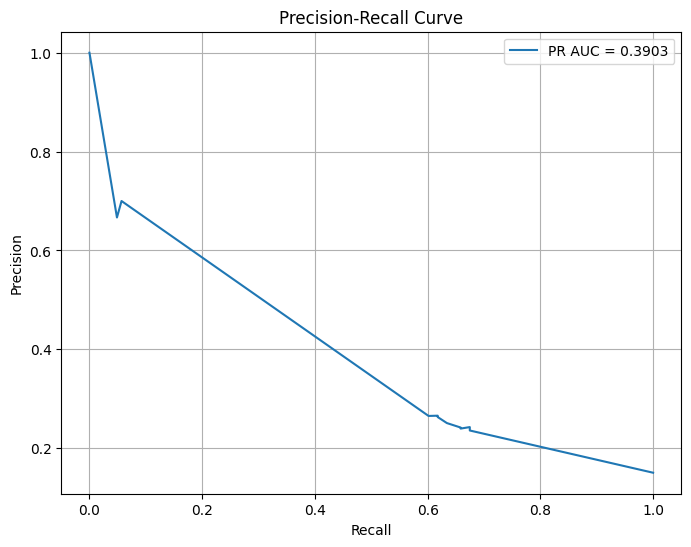

In [57]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_logitboost_tuned)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


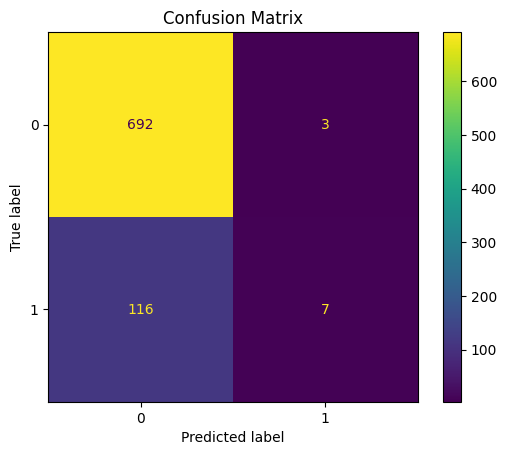

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logitboost_tuned)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logitboost_best_model.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a concise yet diverse hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2'],         # Number of features to consider when splitting
    'bootstrap': [True, False],               # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy']          # Splitting criteria
}

# Initialize Random Forest with class balancing
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# GridSearchCV for Random Forest with 3-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best model from Grid Search
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_

# Making predictions and evaluating the model
y_pred_rf = rf_best_model.predict(X_test)
y_proba_rf = rf_best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Model Performance after Tuning:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define an expanded hyperparameter space
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500, 700],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 20],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],           # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider when splitting
    'bootstrap': [True, False],                 # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy'],           # Splitting criteria
    'class_weight': ['balanced', 'balanced_subsample', None]  # Class balancing options
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=50,               # Number of random samples
    scoring='roc_auc',        # Optimize for AUC
    cv=5,                     # 3-fold cross-validation
    n_jobs=-1,                # Use all available cores
    verbose=2,
    random_state=42           # Ensure reproducibility
)
random_search_rf.fit(X_train, y_train)

# Best model from RandomizedSearchCV
print("Best parameters for Random Forest:", random_search_rf.best_params_)
rf_best_model = random_search_rf.best_estimator_

# Making predictions and evaluating the model
y_pred_rf = rf_best_model.predict(X_test)
y_proba_rf = rf_best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Model Performance after RandomizedSearch Tuning:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
Random Forest Model Performance after RandomizedSearch Tuning:
Accuracy: 0.8509
Precision: 1.0000
Recall: 0.0081
F1 Score: 0.0161
ROC AUC Score: 0.6820


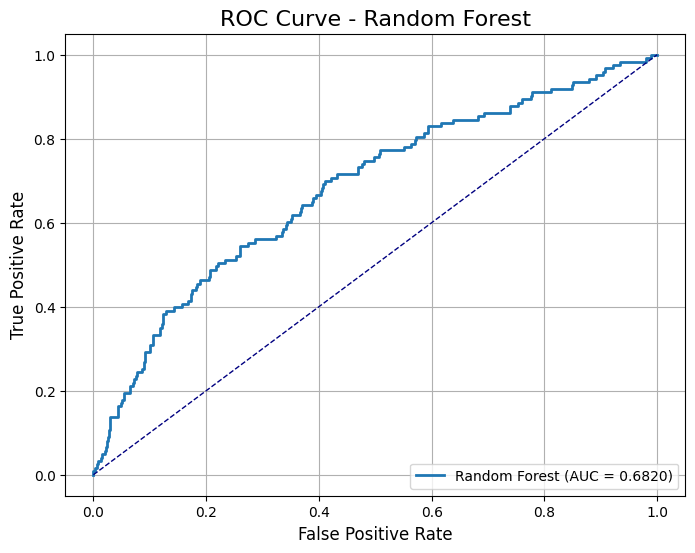

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

# Calculate the area under the ROC curve (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', linewidth=2)

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=1)

# Add plot labels and title
plt.title('ROC Curve - Random Forest', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define hyperparameter distribution for Gradient Boosting
param_dist_gb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Learning rate for boosting
    'n_estimators': [50, 100, 200, 500, 700],     # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],                  # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 8],            # Minimum samples in a leaf
    'subsample': [0.6, 0.7, 0.8, 1.0],           # Fraction of samples used per tree
    'max_features': ['sqrt', 'log2', None]       # Number of features considered for splits
}

# Initialize GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=50,               # Number of random samples
    scoring='roc_auc',        # Optimize for AUC
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # Use all available cores
    verbose=2,
    random_state=42           # Ensure reproducibility
)

# Fit the RandomizedSearchCV
random_search_gb.fit(X_train, y_train)

# Best parameters and evaluation for Gradient Boosting
print("Best parameters for Gradient Boosting:", random_search_gb.best_params_)
gb_best_model = random_search_gb.best_estimator_
y_pred_gb = gb_best_model.predict(X_test)
y_proba_gb = gb_best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)

print("Tuned Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"ROC AUC Score: {roc_auc_gb:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.05}
Tuned Gradient Boosting Model Performance:
Accuracy: 0.8521
Precision: 0.5833
Recall: 0.0569
F1 Score: 0.1037
ROC AUC Score: 0.6813


In [28]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define hyperparameter grid for CatBoost
param_grid_cb = {
    'iterations': [100, 500, 1000],         # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],    # Step size for boosting
    'depth': [4, 6, 8],                    # Maximum depth of the trees
    'l2_leaf_reg': [1, 3, 5],              # Regularization coefficient
    'border_count': [32, 64]               # Number of splits for numeric features
}

# Initialize CatBoostClassifier with auto_class_weights
catboost_model = CatBoostClassifier(
    random_seed=42,
    auto_class_weights='Balanced',  # Automatically handles class imbalance
    verbose=0
)

# GridSearchCV for hyperparameter tuning
grid_search_cb = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid_cb,
    scoring='roc_auc',       # Optimize for AUC
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # Use all available cores
    verbose=2
)

# Fit GridSearchCV
grid_search_cb.fit(X_train, y_train)

# Best model and predictions
print("Best parameters for CatBoost:", grid_search_cb.best_params_)
cb_best_model = grid_search_cb.best_estimator_
y_pred_cb = cb_best_model.predict(X_test)
y_proba_cb = cb_best_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb)
recall_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)
roc_auc_cb = roc_auc_score(y_test, y_proba_cb)

print("Tuned CatBoost Model Performance:")
print(f"Accuracy: {accuracy_cb:.4f}")
print(f"Precision: {precision_cb:.4f}")
print(f"Recall: {recall_cb:.4f}")
print(f"F1 Score: {f1_cb:.4f}")
print(f"ROC AUC Score: {roc_auc_cb:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for CatBoost: {'border_count': 64, 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
Tuned CatBoost Model Performance:
Accuracy: 0.6650
Precision: 0.2492
Recall: 0.6098
F1 Score: 0.3538
ROC AUC Score: 0.6862


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],     # Learning rate
    'n_estimators': [50, 100, 200],         # Number of boosting rounds
    'max_depth': [3, 5, 10],                # Maximum tree depth
    'min_child_weight': [1, 5, 10],         # Minimum sum of instance weights
    'scale_pos_weight': [1, 10, 20]         # Balancing class weights
}

# Initialize XGBoostClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='roc_auc',       # Optimize for ROC AUC
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # Use all available cores
    verbose=2
)

# Fit the GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters and evaluation for XGBoost
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
xgb_best_model = grid_search_xgb.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
y_proba_xgb = xgb_best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("Tuned XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 20}
Tuned XGBoost Model Performance:
Accuracy: 0.6381
Precision: 0.1922
Recall: 0.4390
F1 Score: 0.2673
ROC AUC Score: 0.5740


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

# Preprocessing: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
svm = SVC(probability=True, random_state=42)

# Define hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization strength
    'kernel': ['linear', 'rbf'],      # Linear and RBF kernels
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient (RBF only)
}

# Use GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)

# Best parameters and best model
print("Best parameters for SVM:", grid_search_svm.best_params_)
svm_best_model = grid_search_svm.best_estimator_

# Predictions and probabilities
y_pred_svm = svm_best_model.predict(X_test_scaled)
y_proba_svm = svm_best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

# Classification report
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Print performance metrics and classification report
print("Tuned SVM Model Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC AUC Score: {roc_auc_svm:.4f}")
print("\nClassification Report:")
print(classification_rep_svm)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

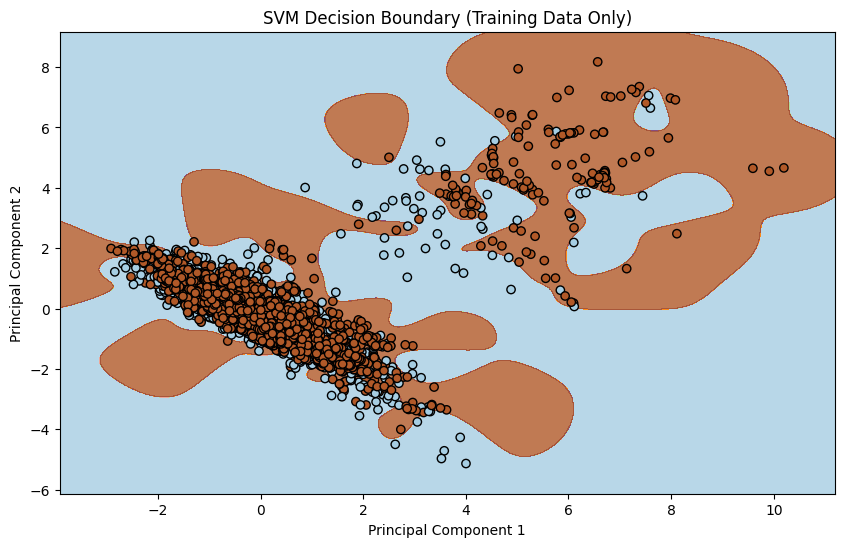

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce training data dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train the SVM model on reduced training data
svm_best_model.fit(X_train_pca, y_train)

# Create a mesh grid for the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the mesh grid
Z = svm_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using only training data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary (Training Data Only)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [52]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are already defined
# Scale the features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with class_weight to handle imbalance
logistic_model = LogisticRegression(class_weight='balanced', max_iter=15000, random_state=42)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)

# Classification report
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

# Print results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1 Score: {f1_logistic:.4f}")
print(f"ROC AUC Score: {roc_auc_logistic:.4f}")
print("\nClassification Report:")
print(classification_rep_logistic)

Logistic Regression Model Performance:
Accuracy: 0.6650
Precision: 0.2572
Recall: 0.6504
F1 Score: 0.3687
ROC AUC Score: 0.6986

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       695
           1       0.26      0.65      0.37       123

    accuracy                           0.67       818
   macro avg       0.59      0.66      0.57       818
weighted avg       0.82      0.67      0.71       818



In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Function to calculate AIC and BIC
def calculate_aic_bic(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
    model.fit(X_scaled, y)

    n = len(y)  # Number of observations
    k = X.shape[1] + 1  # Number of features (including intercept)
    log_likelihood = model.score(X_scaled, y) * n

    aic = 2 * k - 2 * log_likelihood
    bic = np.log(n) * k - 2 * log_likelihood
    return aic, bic

# Define feature evaluation function
def evaluate_feature_importance(data, target_column):
    y = data[target_column]
    X = data.drop(columns=[target_column])
    feature_scores = []

    # Iterate through all subsets of features
    for size in range(1, len(X.columns) + 1):
        for subset in combinations(X.columns, size):
            subset_X = X[list(subset)]
            aic, bic = calculate_aic_bic(subset_X, y)
            feature_scores.append({'features': subset, 'AIC': aic, 'BIC': bic})

    return pd.DataFrame(feature_scores).sort_values(by='AIC')

feature_scores_df = evaluate_feature_importance(data_clean_1, target_column='TenYearCHD')

# Display top feature subsets
feature_scores_df.head()


KeyboardInterrupt: 

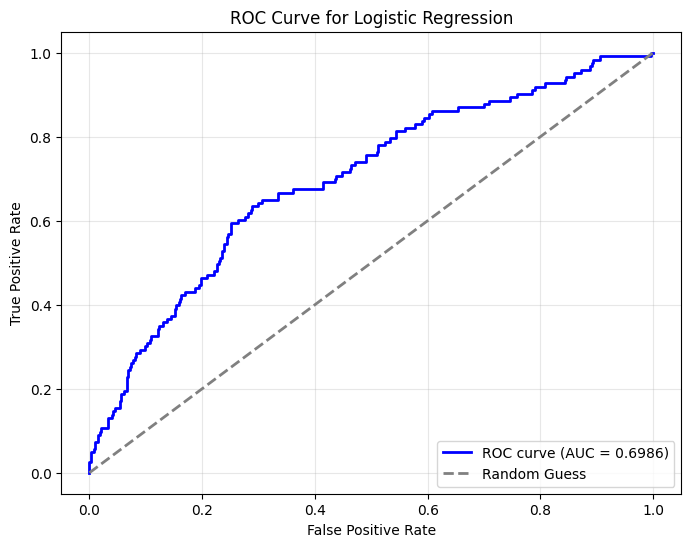

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

original_features = [col for col in X.columns if not any(prefix in col for prefix in ['log_', 'sqrt_', 'age_', 'bmi_'])]
X_train_original = X_train[original_features]
X_test_original = X_test[original_features]

# Train a Logistic Regression model without interaction terms and transformations
lr_original = LogisticRegression(random_state=42, max_iter=1000)
lr_original.fit(X_train_original, y_train)
y_pred_original_lr = lr_original.predict(X_test_original)

# Evaluate the Logistic Regression model without interaction terms and transformations
metrics_original_lr = {
    "Accuracy": accuracy_score(y_test, y_pred_original_lr),
    "Precision": precision_score(y_test, y_pred_original_lr),
    "Recall": recall_score(y_test, y_pred_original_lr),
    "F1 Score": f1_score(y_test, y_pred_original_lr),
    "ROC AUC": roc_auc_score(y_test, lr_original.predict_proba(X_test_original)[:, 1])
}

# Train a Logistic Regression model with all features (including interaction terms and transformations)
lr_transformed = LogisticRegression(random_state=42, max_iter=15000)
lr_transformed.fit(X_train, y_train)
y_pred_transformed_lr = lr_transformed.predict(X_test)

# Evaluate the Logistic Regression model with interaction terms and transformations
metrics_transformed_lr = {
    "Accuracy": accuracy_score(y_test, y_pred_transformed_lr),
    "Precision": precision_score(y_test, y_pred_transformed_lr),
    "Recall": recall_score(y_test, y_pred_transformed_lr),
    "F1 Score": f1_score(y_test, y_pred_transformed_lr),
    "ROC AUC": roc_auc_score(y_test, lr_transformed.predict_proba(X_test)[:, 1])
}

# Compare the metrics for Logistic Regression
comparison_lr = pd.DataFrame(
    [metrics_original_lr, metrics_transformed_lr], 
    index=["Original Features", "Transformed Features"]
)

# Print the comparison
print(comparison_lr)

C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      Accuracy  Precision    Recall  F1 Score   ROC AUC
Original Features     0.853301   0.615385  0.065041  0.117647  0.700298
Transformed Features  0.852078   0.571429  0.065041  0.116788  0.699538


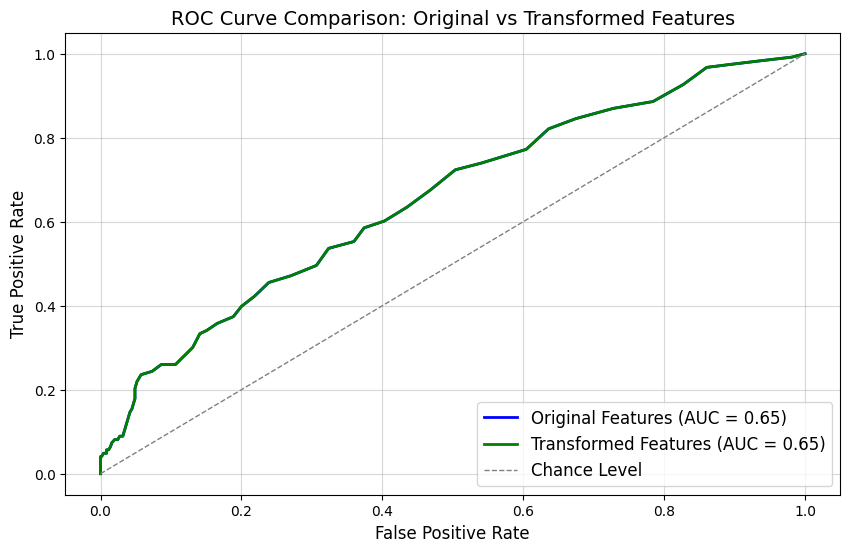

In [55]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for models
fpr_original, tpr_original, _ = roc_curve(y_test, rf_original.predict_proba(X_test_original)[:, 1])
roc_auc_original = auc(fpr_original, tpr_original)

fpr_transformed, tpr_transformed, _ = roc_curve(y_test, rf_transformed.predict_proba(X_test)[:, 1])
roc_auc_transformed = auc(fpr_transformed, tpr_transformed)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label=f'Original Features (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_transformed, tpr_transformed, color='green', lw=2, label=f'Transformed Features (AUC = {roc_auc_transformed:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--', label='Chance Level')

plt.title('ROC Curve Comparison: Original vs Transformed Features', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\johnC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

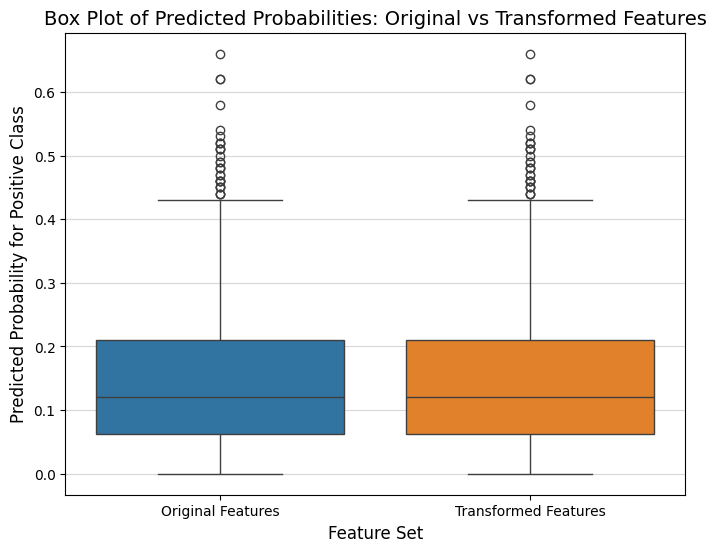

In [56]:
import seaborn as sns
# Extract predictions (probabilities) for the positive class for box plot analysis
original_probs = rf_original.predict_proba(X_test_original)[:, 1]
transformed_probs = rf_transformed.predict_proba(X_test)[:, 1]

# Prepare data for box plots
boxplot_data = pd.DataFrame({
    "Original Features": original_probs,
    "Transformed Features": transformed_probs
})

# Plot the box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=boxplot_data)
plt.title("Box Plot of Predicted Probabilities: Original vs Transformed Features", fontsize=14)
plt.ylabel("Predicted Probability for Positive Class", fontsize=12)
plt.xlabel("Feature Set", fontsize=12)
plt.grid(axis="y", alpha=0.5)
plt.show()


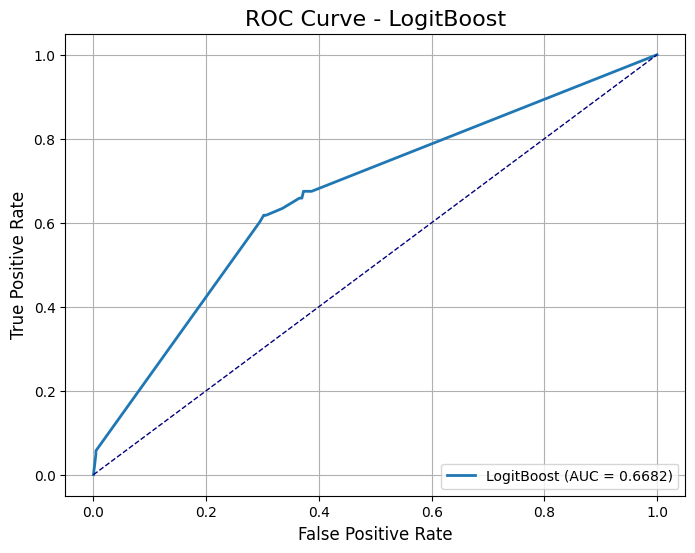

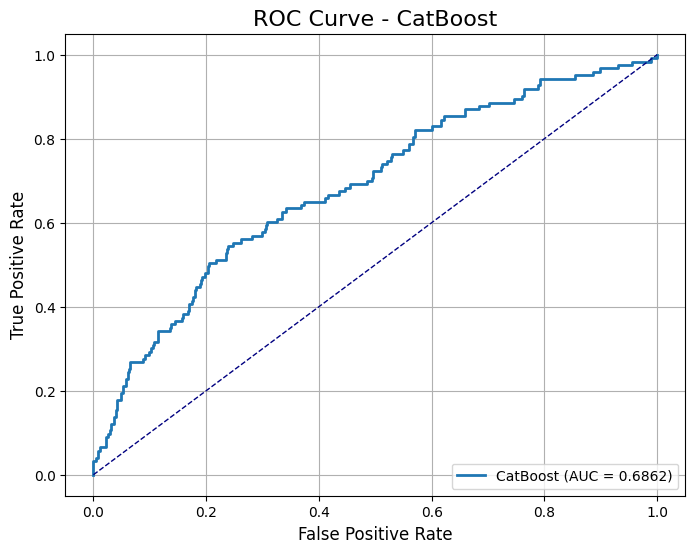

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a dictionary to store model names and their respective predictions
model_roc_info = {
    "LogitBoost": (y_test, y_proba_logitboost_tuned),
    "CatBoost": (y_test, y_proba_cb)  # Replace with your CatBoost probabilities
}

# Create separate plots for each model
for model_name, (true_labels, pred_probs) in model_roc_info.items():
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for the current model
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=1)
    plt.title(f'ROC Curve - {model_name}', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
